<a href="https://colab.research.google.com/github/pragati77/proteins-indentification/blob/main/zikaproteins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter(action='ignore')

In [3]:
pip install biopython


     |████████████████████████████████| 2.3MB 6.0MB/s 


In [4]:
import Bio

In [5]:
from Bio.Seq import Seq

In [6]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

In [7]:
zika = SeqIO.read('/content/ZikaVirus.fasta', "fasta")

In [8]:
print(len(zika))

10808


In [9]:
zika_DNA= zika.seq
print( zika_DNA[:200])

AGTTGTTACTGTTGCTGACTCAGACTGCGACAGTTCGAGTTTGAAGCGAAAGCTAGCAACAGTATCAACAGGTTTTATTTTGGATTTGGAAACGAGAGTTTCTGGTCATGAAAAACCCAAAAAAGAAATCCGGAGGATTCCGGATTGTCAATATGCTAAAACGCGGAGTAGCCCGTGTGAGCCCCTTTGGGGGCTTGAAG


In [10]:
DNA= zika_DNA
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

{'A': 2958, 'G': 3152, 'T': 2313, 'C': 2383, 'K': 1, 'Y': 1}


In [11]:
nts= pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
nts= nts.rename(columns={0: 'frequency', 'index': 'nucleotides'})
nts=nts.sort_values(by=['frequency'], ascending=True)

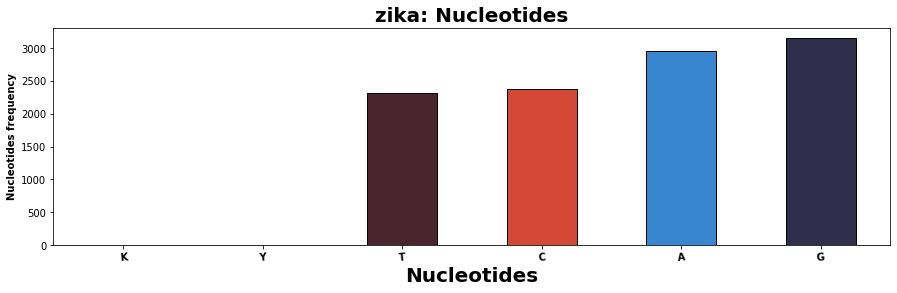

In [12]:
#plot the nucleotides frequency
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
a= nts['frequency'].plot.bar(color=sns.color_palette('icefire',4), edgecolor='black')
plt.xticks(rotation=5)
plt.ylabel("Nucleotides frequency", weight='bold')
r=list(range(len(nts)))
plt.xticks(r, nts.nucleotides, weight='bold')
plt.xlabel("Nucleotides", weight='bold', size=20)
plt.title("zika: Nucleotides", weight='bold', size=20)
plt.show()

In [13]:
zika_mRNA = zika_DNA.transcribe()
print(zika_mRNA[:100])

AGUUGUUACUGUUGCUGACUCAGACUGCGACAGUUCGAGUUUGAAGCGAAAGCUAGCAACAGUAUCAACAGGUUUUAUUUUGGAUUUGGAAACGAGAGUU


In [14]:
print(f'zika DNA: {zika_DNA[:50]}')
print(f'zika RNA: {zika_mRNA[:50]}')

zika DNA: AGTTGTTACTGTTGCTGACTCAGACTGCGACAGTTCGAGTTTGAAGCGAA
zika RNA: AGUUGUUACUGUUGCUGACUCAGACUGCGACAGUUCGAGUUUGAAGCGAA


In [15]:
zika_aa = zika_mRNA.translate()
print(zika_aa[:99])

SCYCC*LRLRQFEFEAKASNSINRFYFGFGNESFWS*KTQKRNPEDSGLSIC*NAE*PV*APLGA*RGCQPDFCWVMGPSGWSWRF*PF*DSRQSSHHW


In [16]:
print(f"zika's genome has {len(zika_aa)} amino acids")

zika's genome has 3602 amino acids


In [17]:
Proteins = zika_aa.split('*')
Proteins[:5]

[Seq('SCYCC'),
 Seq('LRLRQFEFEAKASNSINRFYFGFGNESFWS'),
 Seq('KTQKRNPEDSGLSIC'),
 Seq('NAE'),
 Seq('PV')]

In [18]:
for i in Proteins[:]:
    if len(i) < 50:
        Proteins.remove(i)

In [20]:
print(len(Proteins))

6


In [21]:
proteinas=pd.DataFrame(Proteins)
proteinas['amino acid sequence'] = proteinas[0].apply(str)
proteinas['Protein length'] = proteinas[0].apply(len)
proteinas.rename(columns={0: "sequence"}, inplace=True)
pro=proteinas.drop('sequence', axis=1)
pro= pro.sort_values(by=['Protein length'], ascending=False)

In [22]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

s = pro.style.background_gradient(cmap=cm)
s

,amino acid sequence,Protein length
2,SSYPQPSLLMWGARWTSQRRRRDVVQGCSSITTLKPGGTGTSTILTPPVDWQQQSSKPGKMVSAGSPLFQEWKTSCGDQ,79
1,EVPREWQSWETQPGTLDQLEALSTHWARASIKFLEQLSNHCLEECPGSHKFSLERC,56
3,MPPGTGTARCSSWPCPPERERGTSRLCPEYLRQRMGTLERLRWITQQELQDLQS,54
4,LLGPAHGSCGSRKLSQPELHVSSLLCSYCWWCSYLSQKSKDLPRTTKWQSSSW,53
5,MIWEKLGRTHKSGNPQLDGTTGKKFRFAPTTSTSSISRTGGPLWFPAATKMN,52
0,RACHTPCVPQRSHSPRSRLKHCTGQSQWRYSTQGQMDLARFQLRWRWTCKL,51
